In [ ]:
import tensorflow as tf

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense, ZeroPadding2D,Conv2D, MaxPooling2D, BatchNormalization, Activation
import tensorflow as tf
import cv2
import glob
import skimage.io
import torchvision.models as models
import zipfile
import io
from os import listdir
from sklearn.metrics import confusion_matrix
import imutils
import time
from random import shuffle
from keras import losses
from tensorflow.keras import losses
import shutil
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2 as cv
from PIL import Image, ImageDraw, ImageFilter
from skimage.viewer import ImageViewer
from skimage import filters
from skimage.morphology import erosion, dilation, opening, closing, white_tophat,black_tophat, skeletonize, convex_hull_image,disk
from skimage.data import data_dir
from skimage.util import img_as_ubyte
import copy
from statistics import *
from numpy import array
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving fold0.zip to fold0.zip


In [ ]:
import zipfile
data = zipfile.ZipFile('/content/fold0.zip', 'r')
data.extractall()

In [ ]:
diretorio1 = '/content/drive/MyDrive/Results/m'

In [ ]:
diretorio2 = '/content/fold0/train/M'
diretorio3 = '/content/fold0/test/M'

In [ ]:
arquivos_diretorio1 = os.listdir(diretorio1)
arquivos_diretorio2 = os.listdir(diretorio2)
arquivos_diretorio3 = os.listdir(diretorio3)

In [ ]:
def extrair_nome_correto(nome_arquivo):
    if nome_arquivo.startswith("im"):
        return nome_arquivo[4:]
    return nome_arquivo

In [ ]:
nomes_corretos_diretorio1 = [extrair_nome_correto(nome) for nome in arquivos_diretorio1]

In [ ]:
arquivos_diretorio1 = os.listdir(diretorio1)
nomes_corretos_diretorio1 = [extrair_nome_correto(arquivo) for arquivo in arquivos_diretorio1]

In [ ]:
# Converte as listas de arquivos em conjuntos para facilitar a comparação
conjunto_diretorio1 = set(nomes_corretos_diretorio1)
conjunto_diretorio2 = set(arquivos_combinados)

In [ ]:
# Encontra as imagens ausentes em cada diretório
imagens_ausentes_no_diretorio1 = conjunto_diretorio2 - conjunto_diretorio1
imagens_ausentes_no_diretorio2 = conjunto_diretorio1 - conjunto_diretorio2

In [ ]:
# Combina as duas listas de arquivos em uma única lista
arquivos_combinados = arquivos_diretorio2 + arquivos_diretorio3

In [ ]:
dir_list = ['/content/fold0/train/M/']

In [ ]:
def load_data(dir_list):
    """
    Read images, resize and normalize them.
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []

    for directory in dir_list:
        for filename in sorted(listdir(directory)):
            # load the image
            image = cv2.imread(directory + filename)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            #print(filename)
            if directory == '/content/fold0/train/B/':
                y.append([0])
            else:
                y.append([1])

    X = np.array(X)
    y = np.array(y)

    # Shuffle the data
    #X, y = shuffle(X, y)

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

In [ ]:
from os import listdir
import cv2
import cv2 as cv
X_train, y_treino = load_data(dir_list)

Number of examples is: 163
X shape is: (163, 256, 256, 3)
y shape is: (163, 1)


In [ ]:
X_train = X_train.astype('float32')

In [ ]:
from keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dense, AveragePooling2D, GaussianNoise
from keras.layers import Reshape, UpSampling2D, Activation, Dropout, Flatten, Conv2DTranspose
from keras.models import model_from_json, Sequential
from keras.optimizers import Adam

class GAN(object):

    def __init__(self):

        #Models
        self.D = None
        self.G = None

        self.OD = None

        self.DM = None
        self.AM = None

        #Config
        self.LR = 0.0001
        self.steps = 1

    def discriminator(self):

        if self.D:
            return self.D

        self.D = Sequential()

        #add Gaussian noise to prevent Discriminator overfitting
        self.D.add(GaussianNoise(0.2, input_shape = [256, 256, 3]))

        #256x256x3 Image
        self.D.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same'))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #128x128x8
        self.D.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #64x64x16
        self.D.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #32x32x32
        self.D.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #16x16x64
        self.D.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #8x8x128
        self.D.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())

        #4x4x256
        self.D.add(Flatten())

        #256
        self.D.add(Dense(128))
        self.D.add(LeakyReLU(0.2))

        self.D.add(Dense(1, activation = 'sigmoid'))

        return self.D

    def generator(self):

        if self.G:
            return self.G

        self.G = Sequential()

        self.G.add(Reshape(target_shape = [1, 1, 4096], input_shape = [4096]))

        #1x1x4096
        self.G.add(Conv2DTranspose(filters = 256, kernel_size = 4))
        self.G.add(Activation('relu'))

        #4x4x256 - kernel sized increased by 1
        self.G.add(Conv2D(filters = 256, kernel_size = 4, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #8x8x256 - kernel sized increased by 1
        self.G.add(Conv2D(filters = 128, kernel_size = 4, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #16x16x128
        self.G.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #32x32x64
        self.G.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #64x64x32
        self.G.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #128x128x16
        self.G.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same'))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())

        #256x256x8
        self.G.add(Conv2D(filters = 3, kernel_size = 3, padding = 'same'))
        self.G.add(Activation('sigmoid'))

        return self.G

    def DisModel(self):

        if self.DM == None:
            self.DM = Sequential()
            self.DM.add(self.discriminator())

        self.DM.compile(optimizer = Adam(lr = self.LR * (0.85 ** floor(self.steps / 10000))), loss = 'binary_crossentropy')

        return self.DM

    def AdModel(self):

        if self.AM == None:
            self.AM = Sequential()
            self.AM.add(self.generator())
            self.AM.add(self.discriminator())

        self.AM.compile(optimizer = Adam(lr = self.LR * (0.85 ** floor(self.steps / 10000))), loss = 'binary_crossentropy')

        return self.AM

    def sod(self):

        self.OD = self.D.get_weights()

    def lod(self):

        self.D.set_weights(self.OD)




In [ ]:
class Model_GAN(object):

    def __init__(self):

        self.GAN = GAN()
        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()
        self.generator = self.GAN.generator()

    def train(self, batch = 16):

        (a, b) = self.train_dis(batch)
        c = self.train_gen(batch)

        print(f"D Real: {str(a)}, D Fake: {str(b)}, G All: {str(c)}")

        if self.GAN.steps % 500 == 0:
            self.save(floor(self.GAN.steps / 1000))
            self.evaluate()

        if self.GAN.steps % 5000 == 0:
            self.GAN.AM = None
            self.GAN.DM = None
            self.AdModel = self.GAN.AdModel()
            self.DisModel = self.GAN.DisModel()

        self.GAN.steps = self.GAN.steps + 1

    def train_dis(self, batch):

        #Get Real Images
        im_no = random.randint(0, len(X_train) - batch - 1)
        train_data = X_train[im_no : im_no + int(batch / 2)]
        label_data = []
        for i in range(int(batch / 2)):
            #label_data.append(one())
            label_data.append(zero())

        d_loss_real = self.DisModel.train_on_batch(np.array(train_data), np.array(label_data))

        #Get Fake Images
        train_data = self.generator.predict(noise(int(batch / 2)))
        label_data = []
        for i in range(int(batch / 2)):
            #label_data.append(zero())
            label_data.append(one())

        d_loss_fake = self.DisModel.train_on_batch(train_data, np.array(label_data))

        return (d_loss_real, d_loss_fake)

    def train_gen(self, batch):

        self.GAN.sod()

        label_data = []
        for i in range(int(batch)):
            #label_data.append(one())
            label_data.append(zero())

        g_loss = self.AdModel.train_on_batch(noise(batch), np.array(label_data))

        self.GAN.lod()

        return g_loss

    def evaluate(self):

        im_no = random.randint(0, len(X_train) - 1)
        im1 = X_train[im_no]

        im2 = self.generator.predict(noise(2))

        plt.figure(1)
        plt.imshow(im1)

        plt.figure(2)
        plt.imshow(im2[0])

        plt.figure(3)
        plt.imshow(im2[1])

        plt.show()

    def save(self, num):
        gen_json = self.GAN.G.to_json()
        dis_json = self.GAN.D.to_json()

        with open("Models/gen.json", "w+") as json_file:
            json_file.write(gen_json)

        with open("Models/dis.json", "w+") as json_file:
            json_file.write(dis_json)

        self.GAN.G.save_weights("Models/gen"+str(num)+".h5")
        self.GAN.D.save_weights("Models/dis"+str(num)+".h5")

        print(f"Model number {str(num)} Saved!")

    def load(self, num):
        steps1 = self.GAN.steps

        self.GAN = None
        self.GAN = GAN()

        #Generator
        gen_file = open("Models/gen.json", 'r')
        gen_json = gen_file.read()
        gen_file.close()

        self.GAN.G = model_from_json(gen_json)
        self.GAN.G.load_weights("Models/gen"+str(num)+".h5")

        #Discriminator
        dis_file = open("Models/dis.json", 'r')
        dis_json = dis_file.read()
        dis_file.close()

        self.GAN.D = model_from_json(dis_json)
        self.GAN.D.load_weights("Models/dis"+str(num)+".h5")

        #Reinitialize
        self.generator = self.GAN.generator()
        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()

        self.GAN.steps = steps1

    def eval2(self, num = 0):

        imagen =sorted(listdir('/content/fold0/train/M'))[0]
        im2 = self.generator.predict(noise(6))

        #r1 = np.concatenate(im2[:2], axis = 1)
        #r2 = np.concatenate(im2[2:4], axis = 1)
        #r3 = np.concatenate(im2[4:6], axis = 1)
        #r4 = np.concatenate(im2[6:8], axis = 1)
        #r5 = np.concatenate(im2[8:10], axis = 1)



        r1 = np.concatenate(im2[:1], axis = 1)
        r2 = np.concatenate(im2[1:2], axis = 1)
        r3 = np.concatenate(im2[2:3], axis = 1)
        r4 = np.concatenate(im2[3:4], axis = 1)
        r5 = np.concatenate(im2[4:5], axis = 1)
        r6 = np.concatenate(im2[5:6], axis = 1)

        r1 = Image.fromarray(np.uint8(r1*255))
        r2 = Image.fromarray(np.uint8(r2*255))
        r3 = Image.fromarray(np.uint8(r3*255))
        r4 = Image.fromarray(np.uint8(r4*255))
        r5 = Image.fromarray(np.uint8(r5*255))
        r6 = Image.fromarray(np.uint8(r6*255))

        r1.save("/content/drive/MyDrive/Results/im1_"+imagen)
        r2.save("/content/drive/MyDrive/Results/im2_"+imagen)
        r3.save("/content/drive/MyDrive/Results/im3_"+imagen)
        r4.save("/content/drive/MyDrive/Results/im4_"+imagen)
        r5.save("/content/drive/MyDrive/Results/im5_"+imagen)
        r6.save("/content/drive/MyDrive/Results/im6_"+imagen)

In [ ]:
#os.mkdir('/content/drive/MyDrive/Results')
os.mkdir('Models')

In [ ]:
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from math import floor


def zero():
    return np.random.uniform(0.0, 0.01, size = [1])

def one():
    return np.random.uniform(0.99, 1.0, size = [1])

def noise(n):
    return np.random.uniform(-1.0, 1.0, size = [n, 4096])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_2 (Gaussian  (None, 256, 256, 3)       0         
 Noise)                                                          
                                                                 
 conv2d_26 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 256, 256, 8)       0         
                                                                 
 dropout_12 (Dropout)        (None, 256, 256, 8)       0         
                                                                 
 average_pooling2d_12 (Aver  (None, 128, 128, 8)       0         
 agePooling2D)                                                   
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 16)    

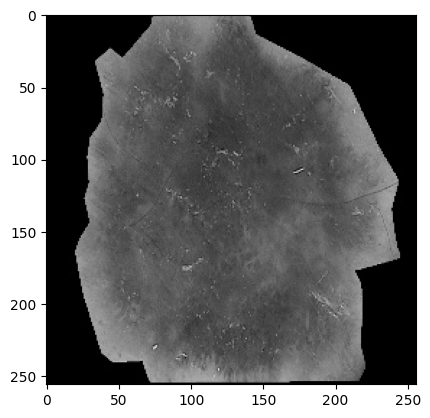

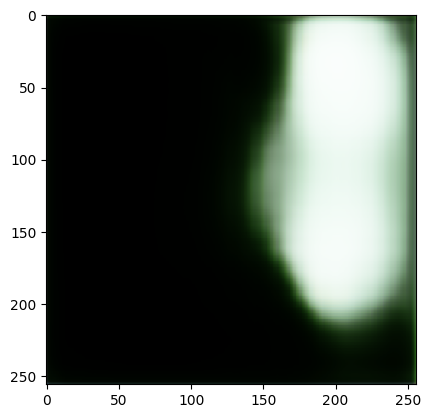

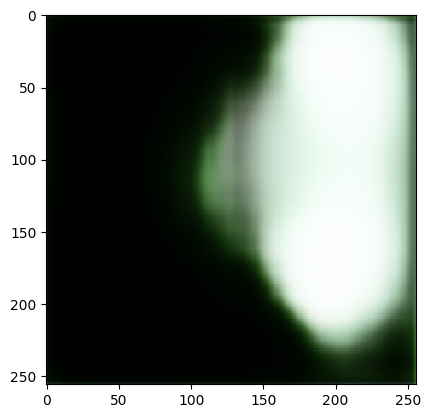

1/1 [==============================] - 0s 18ms/step
D Real: 0.0581536628305912, D Fake: 0.07748023420572281, G All: 4.3458781242370605
1/1 [==============================] - 0s 18ms/step
D Real: 0.05229462683200836, D Fake: 0.08011747896671295, G All: 5.585234642028809
1/1 [==============================] - 0s 18ms/step
D Real: 0.0534621886909008, D Fake: 0.04754841327667236, G All: 6.104708671569824
1/1 [==============================] - 0s 18ms/step
D Real: 0.08627822250127792, D Fake: 0.04248998314142227, G All: 5.961777687072754
1/1 [==============================] - 0s 18ms/step
D Real: 0.04315301403403282, D Fake: 0.04018690437078476, G All: 3.451153039932251
1/1 [==============================] - 0s 21ms/step
D Real: 0.031322233378887177, D Fake: 0.2477211058139801, G All: 5.280607223510742
1/1 [==============================] - 0s 17ms/step
D Real: 0.03407888859510422, D Fake: 0.3461253046989441, G All: 5.900674343109131
1/1 [==============================] - 0s 18ms/step
D Rea

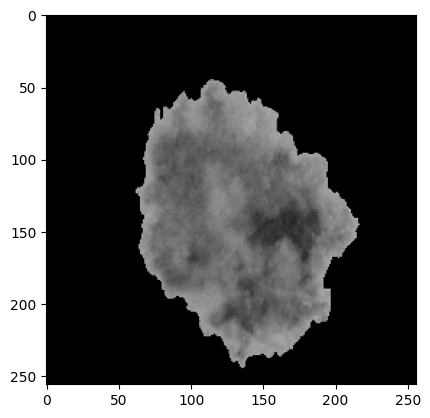

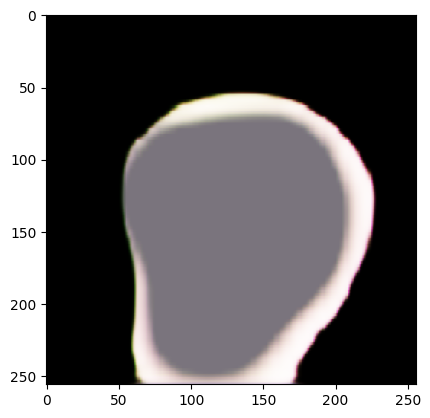

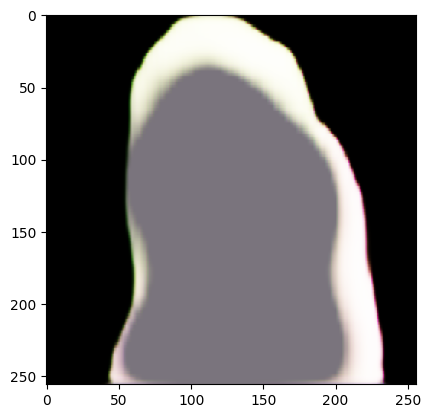

1/1 [==============================] - 0s 22ms/step
D Real: 0.034801777452230453, D Fake: 0.2984437644481659, G All: 1.8327325582504272
1/1 [==============================] - 0s 22ms/step
D Real: 0.07247700542211533, D Fake: 0.5976459980010986, G All: 3.2010233402252197
1/1 [==============================] - 0s 25ms/step
D Real: 0.19273491203784943, D Fake: 0.5577254891395569, G All: 4.998363018035889
1/1 [==============================] - 0s 25ms/step
D Real: 3.3910937309265137, D Fake: 0.13280346989631653, G All: 3.9993152618408203
1/1 [==============================] - 0s 26ms/step
D Real: 0.1861112117767334, D Fake: 0.24042950570583344, G All: 2.1962881088256836
1/1 [==============================] - 0s 24ms/step
D Real: 0.07478639483451843, D Fake: 0.4252583086490631, G All: 2.2747271060943604
1/1 [==============================] - 0s 24ms/step
D Real: 0.19383454322814941, D Fake: 0.3670109212398529, G All: 1.4210314750671387
1/1 [==============================] - 0s 26ms/step
D R

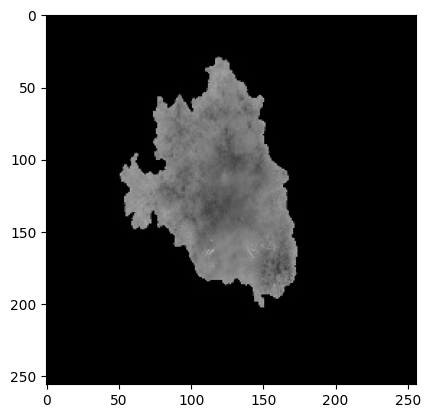

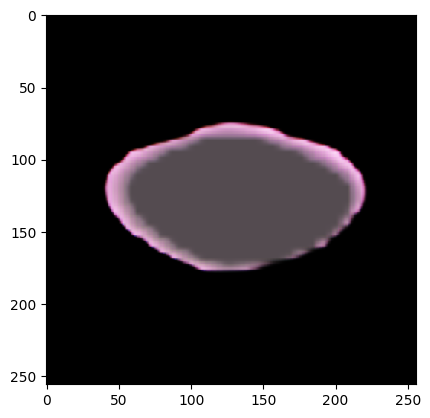

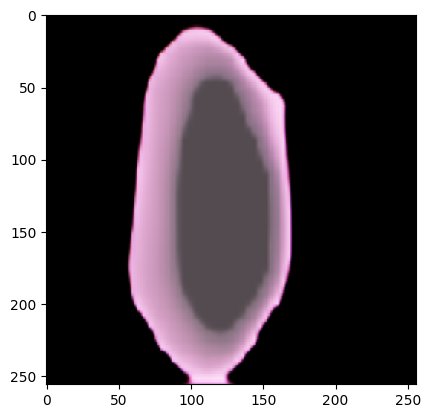

1/1 [==============================] - 0s 20ms/step
D Real: 0.5088218450546265, D Fake: 0.9569533467292786, G All: 1.3887734413146973
1/1 [==============================] - 0s 19ms/step
D Real: 0.07541700452566147, D Fake: 1.7278355360031128, G All: 1.5993942022323608
1/1 [==============================] - 0s 18ms/step
D Real: 0.04755859822034836, D Fake: 0.11992135643959045, G All: 3.417412281036377
1/1 [==============================] - 0s 18ms/step
D Real: 0.4819558262825012, D Fake: 0.1277965009212494, G All: 4.143561840057373
1/1 [==============================] - 0s 18ms/step
D Real: 0.6147948503494263, D Fake: 0.06090155988931656, G All: 4.482265472412109
1/1 [==============================] - 0s 18ms/step
D Real: 0.7682739496231079, D Fake: 0.16612698137760162, G All: 2.8086228370666504
1/1 [==============================] - 0s 18ms/step
D Real: 0.44780391454696655, D Fake: 0.49081459641456604, G All: 1.9691749811172485
1/1 [==============================] - 0s 18ms/step
D Real

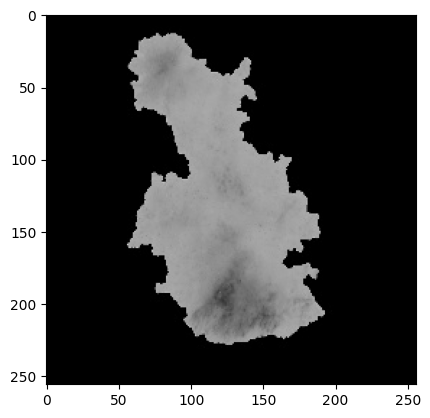

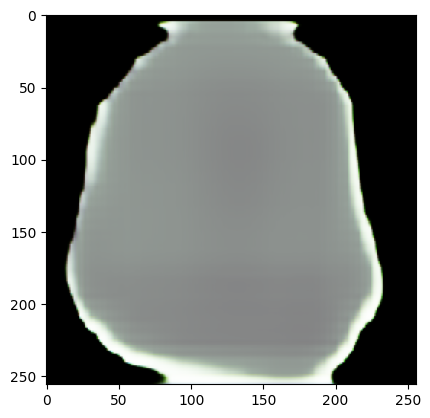

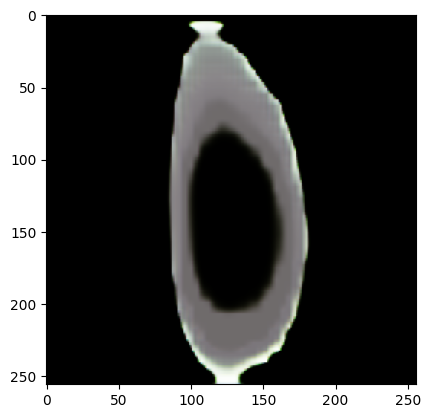

1/1 [==============================] - 0s 19ms/step
D Real: 0.17610599100589752, D Fake: 0.06721287220716476, G All: 3.8567256927490234
1/1 [==============================] - 0s 20ms/step
D Real: 0.15611758828163147, D Fake: 0.08529257029294968, G All: 3.6993885040283203
1/1 [==============================] - 0s 18ms/step
D Real: 1.0188013315200806, D Fake: 0.07470822334289551, G All: 2.685962200164795
1/1 [==============================] - 0s 18ms/step
D Real: 0.05581250414252281, D Fake: 0.3543737530708313, G All: 1.5402450561523438
1/1 [==============================] - 0s 17ms/step
D Real: 0.0860314667224884, D Fake: 0.9597111940383911, G All: 1.4391876459121704
1/1 [==============================] - 0s 17ms/step
D Real: 0.14596474170684814, D Fake: 0.2364617884159088, G All: 2.7222485542297363
1/1 [==============================] - 0s 18ms/step
D Real: 0.377447247505188, D Fake: 0.24727746844291687, G All: 2.132812976837158
1/1 [==============================] - 0s 18ms/step
D Rea

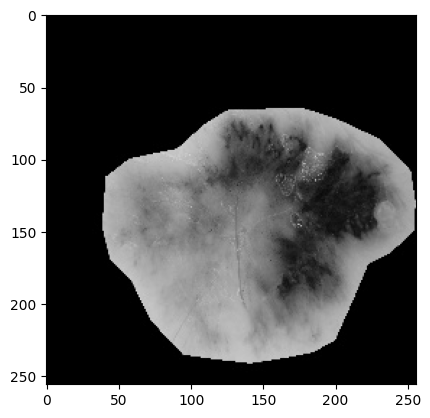

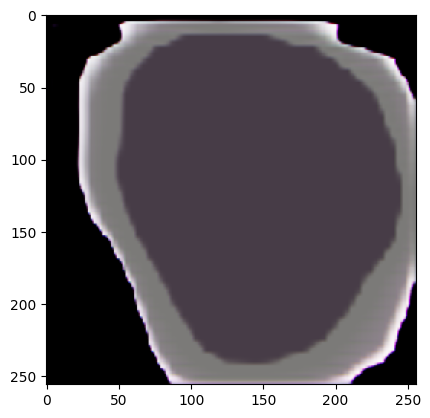

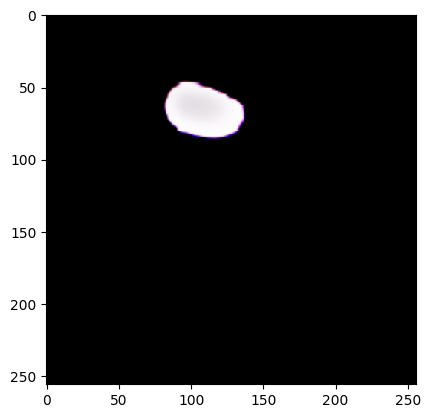

1/1 [==============================] - 0s 19ms/step
D Real: 0.0549619197845459, D Fake: 0.0525953508913517, G All: 4.71025276184082
1/1 [==============================] - 0s 18ms/step
D Real: 0.05340392887592316, D Fake: 0.080754354596138, G All: 3.3160400390625
1/1 [==============================] - 0s 17ms/step
D Real: 0.03661689534783363, D Fake: 0.0786328911781311, G All: 3.2119269371032715
1/1 [==============================] - 0s 17ms/step
D Real: 0.1250402182340622, D Fake: 0.12389972805976868, G All: 3.0069212913513184
1/1 [==============================] - 0s 18ms/step
D Real: 0.05771087110042572, D Fake: 0.31277769804000854, G All: 2.863028049468994
1/1 [==============================] - 0s 17ms/step
D Real: 0.05696703493595123, D Fake: 0.12787838280200958, G All: 4.0050764083862305
1/1 [==============================] - 0s 18ms/step
D Real: 0.04213907569646835, D Fake: 0.09244073927402496, G All: 3.67092227935791
1/1 [==============================] - 0s 18ms/step
D Real: 0.

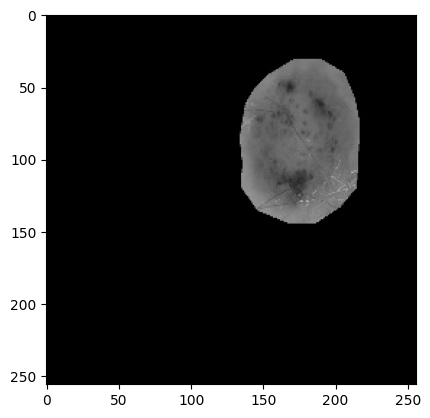

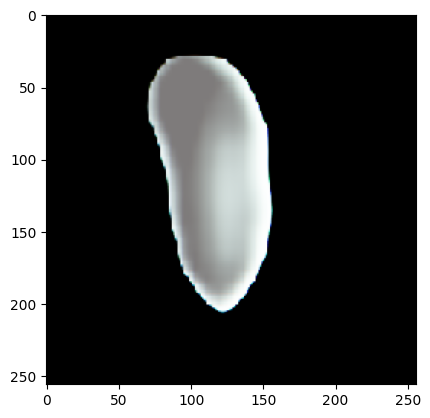

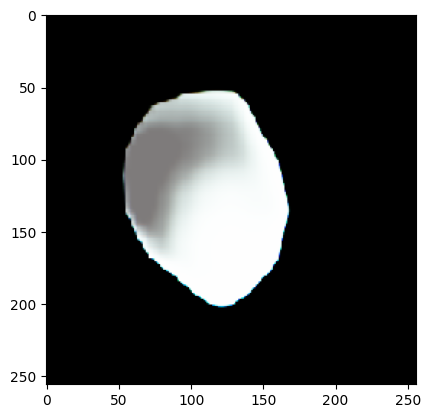

1/1 [==============================] - 0s 17ms/step
D Real: 0.03979650139808655, D Fake: 0.07030555605888367, G All: 5.6655073165893555
1/1 [==============================] - 0s 18ms/step
D Real: 0.043117038905620575, D Fake: 0.03804193437099457, G All: 6.970237731933594
1/1 [==============================] - 0s 20ms/step
D Real: 0.04612644761800766, D Fake: 0.04633646458387375, G All: 6.413057804107666
1/1 [==============================] - 0s 19ms/step
D Real: 0.05135825276374817, D Fake: 0.04751737415790558, G All: 6.98911190032959
1/1 [==============================] - 0s 18ms/step
D Real: 0.04147402197122574, D Fake: 0.044392265379428864, G All: 6.072735786437988
1/1 [==============================] - 0s 18ms/step
D Real: 0.03883178532123566, D Fake: 0.04759631305932999, G All: 4.640695571899414
1/1 [==============================] - 0s 19ms/step
D Real: 0.6319953203201294, D Fake: 0.031967148184776306, G All: 4.845187664031982
1/1 [==============================] - 0s 19ms/step
D

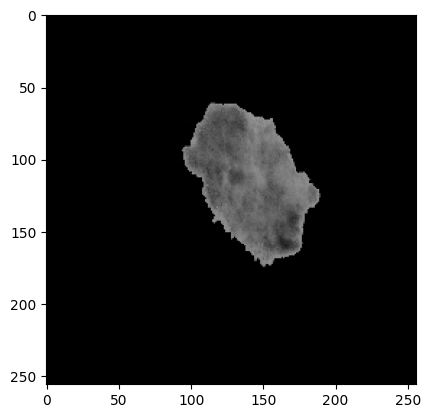

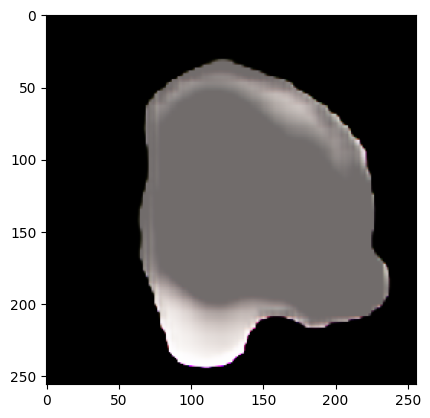

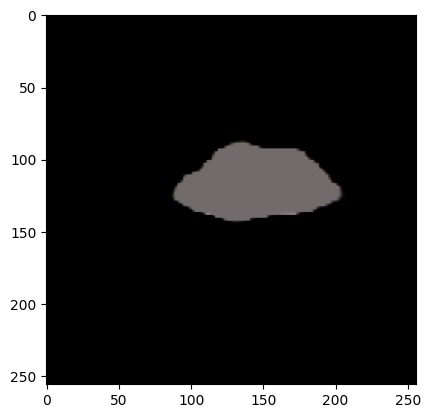

1/1 [==============================] - 0s 21ms/step
D Real: 0.07339731603860855, D Fake: 0.03313273936510086, G All: 5.338229179382324
1/1 [==============================] - 0s 21ms/step
D Real: 0.11489325016736984, D Fake: 0.03297556936740875, G All: 6.949648380279541
1/1 [==============================] - 0s 23ms/step
D Real: 1.774449110031128, D Fake: 0.06569798290729523, G All: 4.4983978271484375
1/1 [==============================] - 0s 21ms/step
D Real: 0.058099061250686646, D Fake: 0.22804738581180573, G All: 2.565141201019287
1/1 [==============================] - 0s 22ms/step
D Real: 0.04837006330490112, D Fake: 0.36096400022506714, G All: 4.303215026855469
1/1 [==============================] - 0s 21ms/step
D Real: 0.10701161623001099, D Fake: 0.050428129732608795, G All: 4.240572929382324
1/1 [==============================] - 0s 21ms/step
D Real: 0.03483780845999718, D Fake: 0.02637859806418419, G All: 4.163288593292236
1/1 [==============================] - 0s 20ms/step
D 

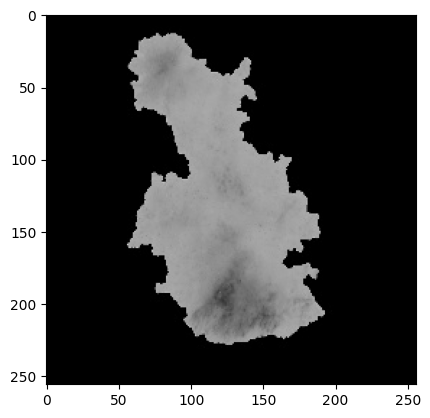

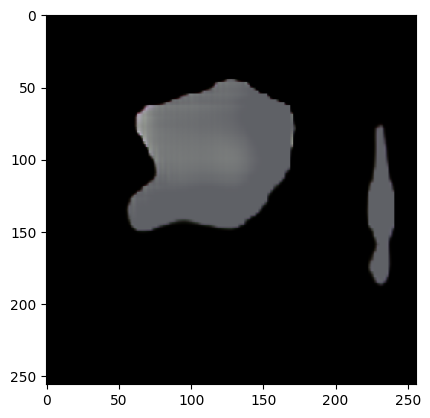

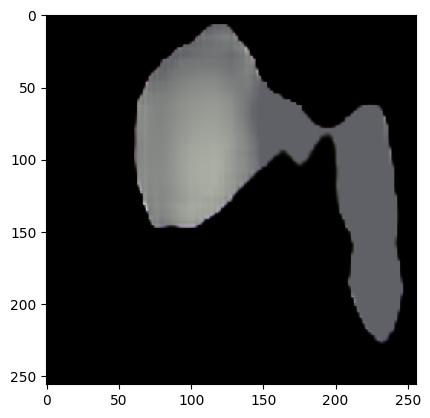

1/1 [==============================] - 0s 18ms/step
D Real: 0.14953146874904633, D Fake: 0.05732421576976776, G All: 5.5620036125183105
1/1 [==============================] - 0s 19ms/step
D Real: 0.1507154256105423, D Fake: 0.0578497052192688, G All: 4.913185119628906
1/1 [==============================] - 0s 18ms/step
D Real: 0.21666991710662842, D Fake: 0.07829873263835907, G All: 5.334262371063232
1/1 [==============================] - 0s 18ms/step
D Real: 0.4850344657897949, D Fake: 0.03463535010814667, G All: 5.554048538208008
1/1 [==============================] - 0s 19ms/step
D Real: 0.026746083050966263, D Fake: 0.04503714293241501, G All: 3.673630952835083
1/1 [==============================] - 0s 19ms/step
D Real: 0.05921816825866699, D Fake: 0.34460341930389404, G All: 3.2453341484069824
1/1 [==============================] - 0s 18ms/step
D Real: 0.039642468094825745, D Fake: 0.9712866544723511, G All: 3.513462781906128
1/1 [==============================] - 0s 19ms/step
D R

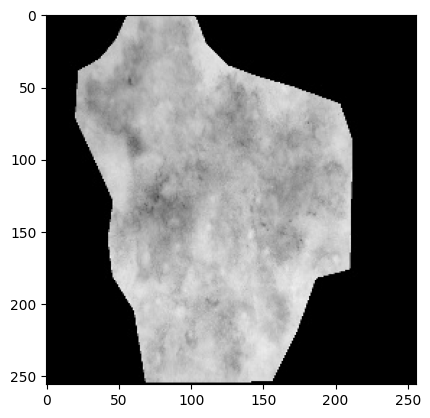

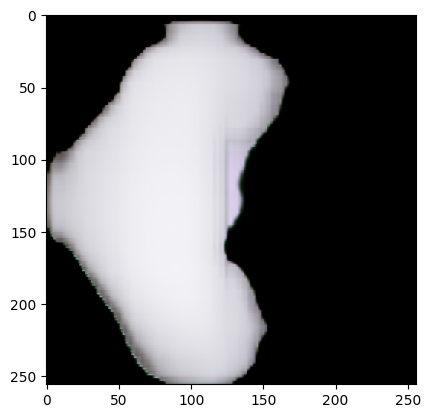

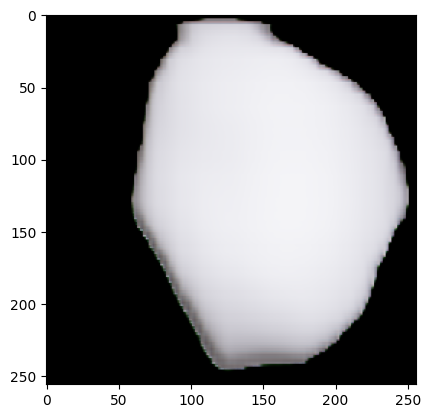

1/1 [==============================] - 0s 18ms/step
D Real: 0.03110082447528839, D Fake: 0.034697696566581726, G All: 7.247809886932373
1/1 [==============================] - 0s 18ms/step
D Real: 0.041721224784851074, D Fake: 0.031058046966791153, G All: 6.525117874145508
1/1 [==============================] - 0s 18ms/step
D Real: 0.048577770590782166, D Fake: 0.030428580939769745, G All: 5.872288227081299
1/1 [==============================] - 0s 18ms/step
D Real: 0.04103768244385719, D Fake: 0.06093817949295044, G All: 6.259520530700684
1/1 [==============================] - 0s 20ms/step
D Real: 0.04778946191072464, D Fake: 0.033193282783031464, G All: 6.549868583679199
1/1 [==============================] - 0s 18ms/step
D Real: 0.051220059394836426, D Fake: 0.0319778248667717, G All: 5.777740955352783
1/1 [==============================] - 0s 19ms/step
D Real: 0.02778223529458046, D Fake: 0.059389904141426086, G All: 5.231451988220215
1/1 [==============================] - 0s 18ms/s

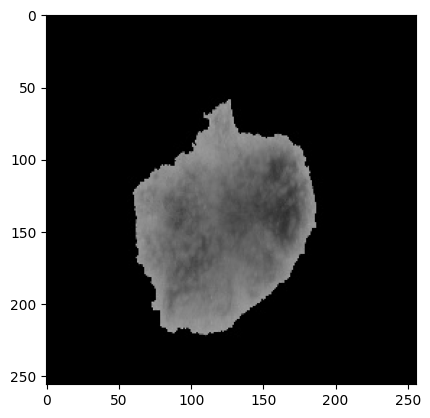

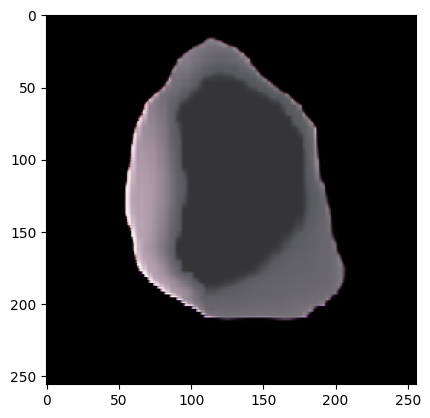

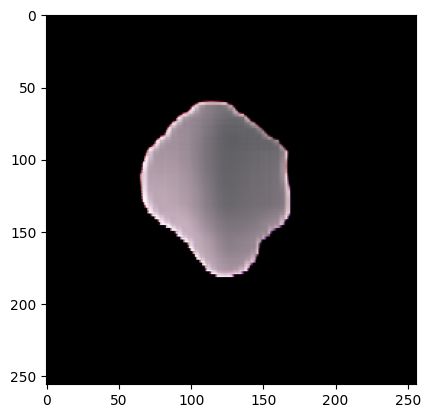

1/1 [==============================] - 0s 19ms/step
D Real: 0.17953136563301086, D Fake: 0.7010204195976257, G All: 1.0397776365280151
1/1 [==============================] - 0s 20ms/step
D Real: 0.08491016924381256, D Fake: 0.6354302167892456, G All: 2.703308343887329
1/1 [==============================] - 0s 20ms/step
D Real: 0.5671646595001221, D Fake: 0.5576271414756775, G All: 4.486632347106934
1/1 [==============================] - 0s 20ms/step
D Real: 0.7115246057510376, D Fake: 0.03383650630712509, G All: 4.162927627563477
1/1 [==============================] - 0s 19ms/step
D Real: 0.6553958654403687, D Fake: 0.22374427318572998, G All: 2.39034366607666
1/1 [==============================] - 0s 18ms/step
D Real: 0.29686272144317627, D Fake: 0.17884626984596252, G All: 1.3232359886169434
1/1 [==============================] - 0s 18ms/step
D Real: 0.09759505838155746, D Fake: 0.5546159744262695, G All: 0.7965259552001953
1/1 [==============================] - 0s 19ms/step
D Real: 

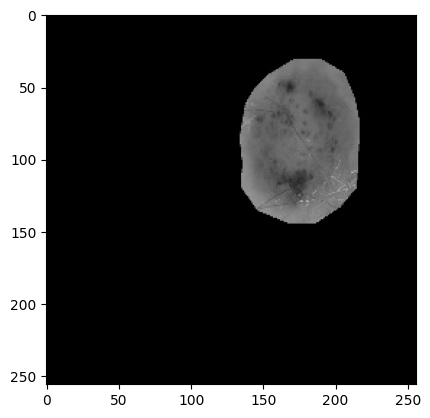

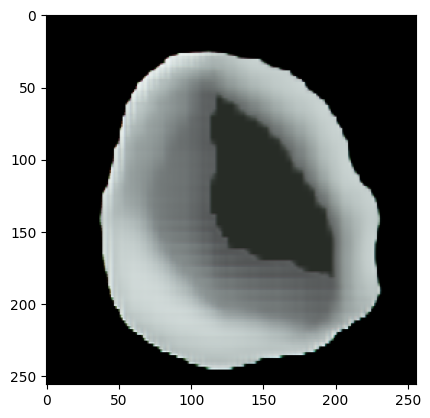

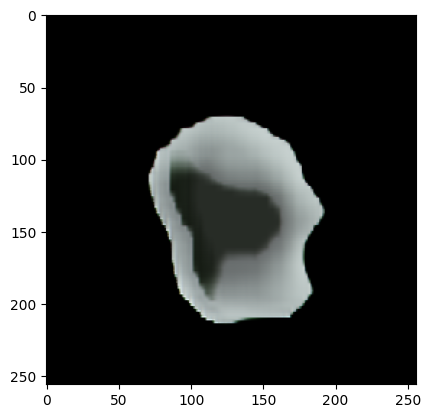

1/1 [==============================] - 0s 24ms/step
D Real: 0.06520943343639374, D Fake: 0.11019772291183472, G All: 3.0547635555267334
1/1 [==============================] - 0s 24ms/step
D Real: 0.507213294506073, D Fake: 0.12586073577404022, G All: 2.3701443672180176
1/1 [==============================] - 0s 22ms/step
D Real: 0.15959179401397705, D Fake: 0.2898717224597931, G All: 2.2904489040374756
1/1 [==============================] - 0s 22ms/step
D Real: 0.20840762555599213, D Fake: 0.18003176152706146, G All: 2.072615623474121
1/1 [==============================] - 0s 21ms/step
D Real: 0.4851929545402527, D Fake: 0.30632588267326355, G All: 1.0742533206939697
1/1 [==============================] - 0s 23ms/step
D Real: 0.2728220224380493, D Fake: 1.039292573928833, G All: 1.7228538990020752
1/1 [==============================] - 0s 24ms/step
D Real: 0.49957531690597534, D Fake: 0.6279486417770386, G All: 3.609917640686035
1/1 [==============================] - 0s 22ms/step
D Real

KeyboardInterrupt: ignored

In [ ]:
#if training new model:
model = Model_GAN()
model.GAN.D.summary()
model.GAN.G.summary()

print("We're off! See you in a while!")
#model.GAN.steps = 165001
while(model.GAN.steps < 500000):

    #print("\n\n\n\nRound " + str(model.GAN.steps) + ":")
    model.train()
    if model.GAN.steps % 500 == 0:
        print("\nRound: " + str(model.GAN.steps))

    if model.GAN.steps % 1000 == 0:
        print("\n\n\n\nRound " + str(model.GAN.steps) + ":")
        model.eval2(int(model.GAN.steps / 1000))